\begin{bmatrix}
    0  & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & 0 & 0 \dots & 0 \\
    0  & 0 & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & 0 \dots & 0 \\
    \dots
\end{bmatrix}

In [9]:
# Transition matrix

import numpy as np

P = np.zeros((101, 101))

for i in range(101):
    P[i, i:i+6] = 1/6
    
P[95:100, 100] += np.linspace(1/6, 5/6, 5)

In [6]:
moves = np.zeros(101)

moves[0] = 1

n = 0
Prob = []
Probability = 0

while Probability < 0.999999:
    
    moves = moves.dot(P)
    Prob.append(moves[100])
    Probability += Prob[-1]
    n += 1

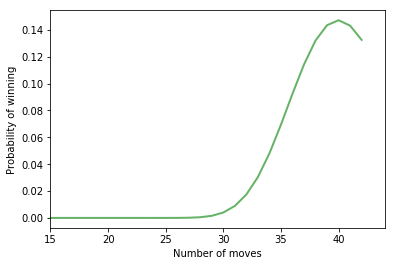

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(np.linspace(1,n,n), Prob, 'g', lw=2, alpha=0.6)
ax.set_xlim(15)
ax.set_xlabel('Number of moves')
ax.set_ylabel('Probability of winning')

plt.show()

modal number of moves: 19


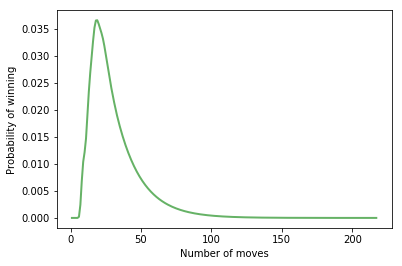

In [8]:
ladders = [(3,19), (15,37), (22,42), (25,64), (41,73),
           (53,74), (63,86), (76,91), (84,98)]
snakes = [(11,7), (18,13), (28,12), (36,34), (77,16),
          (47,26), (83,39), (92,75), (99,70)]

trans = ladders + snakes


T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

for (i1,i2) in trans:
    iw = np.where(T[:,i1] > 0)
    T[:,i1] = 0
    T[iw,i2] += 1/6


T[95:100,100] += np.linspace(1/6, 5/6, 5)
for snake in snakes:
    T[snake,100] = 0


v = np.zeros(101)
v[0] = 1

n, P = 0, []
cumulative_prob = 0

while cumulative_prob < 0.99999:
    n += 1
    v = v.dot(T)
    P.append(v[100])
    cumulative_prob += P[-1]
mode = np.argmax(P)+1
print('modal number of moves:', mode)


fig, ax = plt.subplots()
ax.plot(np.linspace(1,n,n), P, 'g-', lw=2, alpha=0.6, label='Markov')
ax.set_xlabel('Number of moves')
ax.set_ylabel('Probability of winning')

plt.show()